# Maps with Cartopy

Author: Mike Wood

Learning objectives: By the end of this notebook, you should be able to:
1. Create a map using cartopy
2. Change a map projection
3. Add continents, grid lines, and other features to a map

When working with geophysical data, we often want to plot data on a map. We can use the native coordinates of our data to make simple 2D maps, but what if we want to work with different projections and visualizations for our data? Python's `cartopy` package provides a convenient set of tools to plot data on the map.

**Import the modules for this notebook**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io import shapereader
import matplotlib.ticker as mticker

## Coastlines
The `cartopy` package stores a copy of the global coastlines which can be plotted on a map with any given projection.

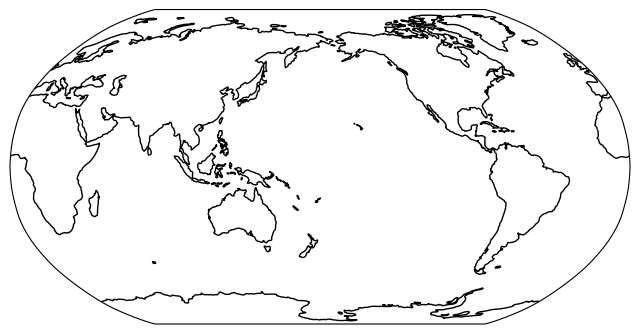

In [3]:
# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))

# add the coastlines
ax.coastlines()

# show the plot
plt.show()

#### Projections
As you can see above, the axes object provides the projection system for the map. The `cartopy` package has a variety of different projections for plotting mapped data. Test some of the common projections in the figure above:

| Projection Code | Default Parameters |
|-----------------|--------------------|
|  PlateCarree()  | central_longitude=0.0 |
| Mollweide()     | central_longitude=0.0 |
| Orthographic()  | central_longitude=0.0, central_latitude=0.0 |
| Robinson()      | central_longitude=0.0 |
| InterruptedGoodeHomolosine() | central_longitude=0.0 |

When you find your favorite project, try changing the default central longitude/latitude to see how the plot changes.

You can find the full list of projections [HERE](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

## Basemaps
Often, we may want to include a *basemap* image to cover parts of the map where we do not have data. `cartopy` has  default built-in image to do just that:

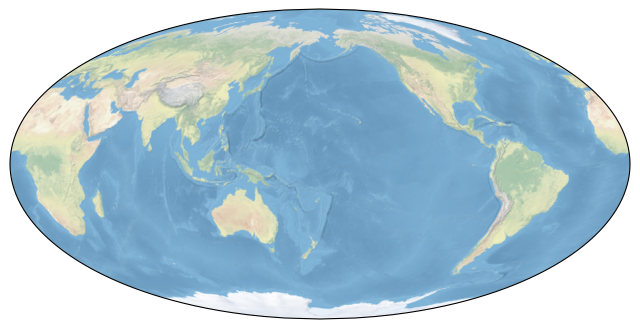

In [4]:
# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Mollweide projection
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-180))

# add the stock image
ax.stock_img()

# show the plot
plt.show()

Basemap can also search for and plot tiles from Google Earth:

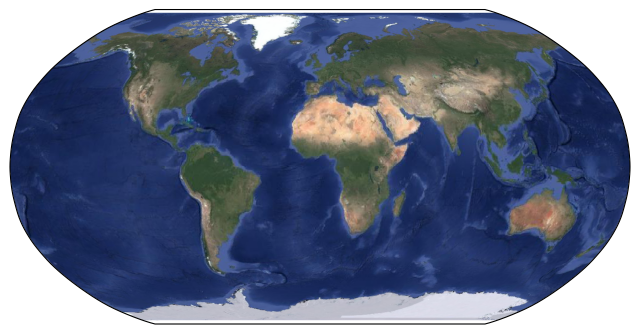

In [5]:
# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection=ccrs.Robinson())

# add the google earth satellite imagery
request = cimgt.GoogleTiles(style='satellite');
ax.add_image(request, 2)

# show the plot
plt.show()

## Plotting Data on the Map
Now that we have a map, we'd like to be able to plot our own data on the map. Begin by reading in a file for bathymetry using the `netCDF` package:

In [6]:
# define a file path to one of the nc files
file_path = 'global_bathymetry.nc'

# open the file and read in the data
ds = nc4.Dataset(file_path)
longitude = np.array(ds.variables['longitude'])
latitude = np.array(ds.variables['latitude'])
depth = np.array(ds.variables['Depth'])
ds.close()

Next, we'll plot this data on the map:

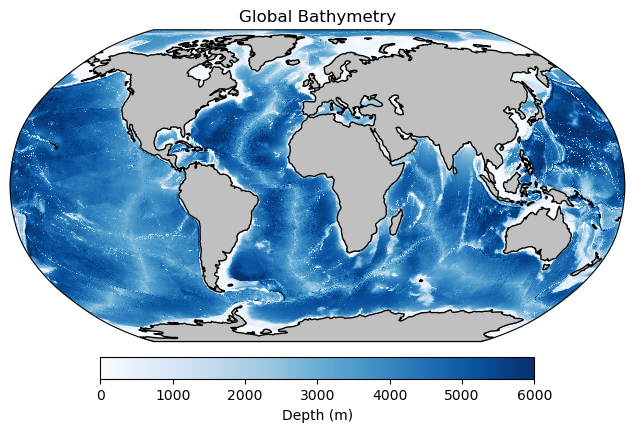

In [14]:
# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection=ccrs.Robinson())

# use pcolormesh to plot the data as before
# pass a new argument for transform=ccrs.PlateCarree()
C = plt.pcolormesh(longitude, latitude, depth,
                   vmin=0, vmax=6000, cmap='Blues', transform=ccrs.PlateCarree())

# add a colorbar with a label below the plot
cbar = plt.colorbar(C, orientation='horizontal',shrink=0.7,pad=0.04)
cbar.set_label('Depth (m)')

# add land features over the data
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver')

# add a title to the plot with the date
plt.title('Global Bathymetry')

# show the plot
plt.show()

In the above code block, it is important to note the `transform=ccrs.PlateCarree()` flag in the following line:

```
C = plt.pcolormesh(longitude, latitude, depth,
                   vmin=0, vmax=6000, cmap='Blues', transform=ccrs.PlateCarree())
```

This line is important because cartopy will interpret the spatial data (longitude and latitude in this case) in the coordinate system in this map. Since longtiude and latitude are in the `PlateCarree` projection (not the `Robinson` projection stored above), the locations need to be reproject to be added tto he map in the correct location.

### Plotting a subset
Just as with regular 2D plots, we can plot just a subset of the data. Modify the plot above be just in the subset define by longitude -125 to -75, and latitude 0 to 39.

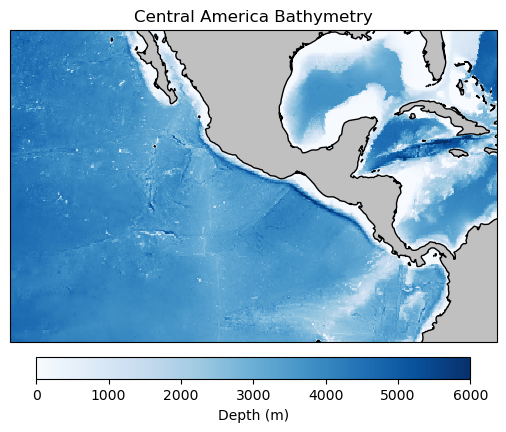

In [13]:
# copy the code block above
# before showing the plot change, the extent to the subset described in the text above
# be sure to pass the transform to the extent

# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection=ccrs.Robinson())

# use pcolormesh to plot the data as before
# pass a new argument for transform=ccrs.PlateCarree()
C = plt.pcolormesh(longitude, latitude, depth,
                   vmin=0, vmax=6000, cmap='Blues', transform=ccrs.PlateCarree())

# add a colorbar with a label below the plot
cbar = plt.colorbar(C, orientation='horizontal',shrink=0.7,pad=0.04)
cbar.set_label('Depth (m)')

# add land features over the data
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver')

# add a title to the plot with the date
plt.title('Central America Bathymetry')

# change the extent
ax.set_extent([-125, -75, 0, 30], ccrs.PlateCarree())

# show the plot
plt.show()

Note again that the `ccrs.PlateCarree()` flag is passed to the `extents` function so that the coordinates are interpreted correcly in the map projection.

### Rotating a Plot
Often, we want out maps to be focused on our particular region of the global ocean. To do this, we can use the central longitude and latitude keywords in the projections. Try this with the Orthographic projection below:

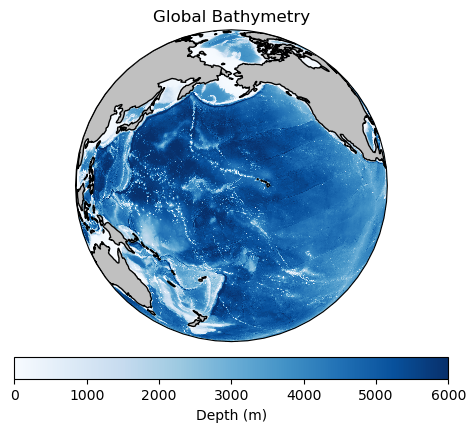

In [15]:
# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection=ccrs.Orthographic(central_longitude = -170, central_latitude=20))

# use pcolormesh to plot the data as before
# pass a new argument for transform=ccrs.PlateCarree()
C = plt.pcolormesh(longitude, latitude, depth,
                   vmin=0, vmax=6000, cmap='Blues', transform=ccrs.PlateCarree())

# add a colorbar with a label below the plot
cbar = plt.colorbar(C, orientation='horizontal',shrink=0.7,pad=0.04)
cbar.set_label('Depth (m)')

# add land features over the data
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver')

# add a title to the plot with the date
plt.title('Global Bathymetry')

# show the plot
plt.show()

## Longitude and Latitude Lines
Longitude and latitude lines can be added with the help of the `matplotlib.ticker` module

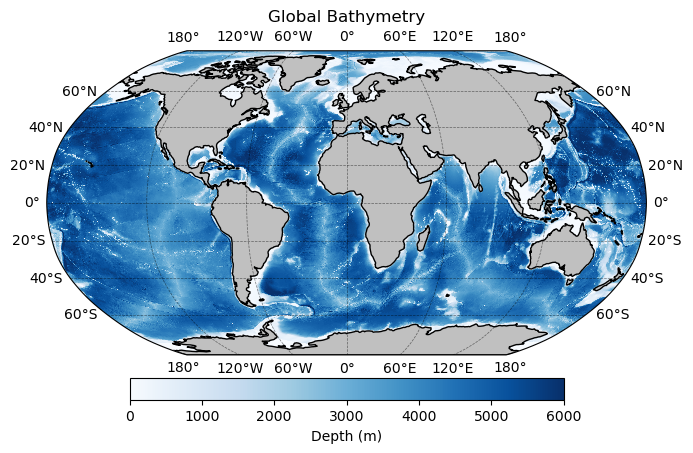

In [11]:
# create a new figure with size (8,5)
fig = plt.figure(figsize=(8,5))

# add a new set of axes with the Robinson projection
ax = plt.axes(projection=ccrs.Robinson())

# use pcolormesh to plot the data as before
# pass a new argument for transform=ccrs.PlateCarree()
C = plt.pcolormesh(longitude, latitude, depth,
                   vmin=0, vmax=6000, cmap='Blues', transform=ccrs.PlateCarree())

# add a colorbar with a label below the plot
cbar = plt.colorbar(C, orientation='horizontal',shrink=0.7,pad=0.06)
cbar.set_label('Depth (m)')

# add land features over the data
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black', facecolor='silver')

# add a title to the plot with the date
plt.title('Global Bathymetry')

# before showing the plot, add gridlines with crs=ccrs.PlateCarree()
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)

# use the xlocator and ylocator attributes to determine the location of the lon/lat lines
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,60))
gl.ylocator = mticker.FixedLocator([-60, -40, -20, 0, 20, 40, 60])

# show the plot
plt.show()

## Working with Shapefiles

We can also use `cartopy` to plot shapefiles on a map. For this example, we will read in a shapefile outlining the Marine Protected Areas in the Monterey Bay area. This shapefile was obtained from the data.gov site [HERE](https://catalog.data.gov/dataset/california-marine-protected-areas-ds582-fce83/resource/93370aad-9743-45c6-86ca-d183bbdb5f55).

In [46]:
# define the shapefile
shp_file = 'California_Marine_Protected_Areas'

# read in the shapefile
mpas = shapereader.Reader(shp_file)

Next, we can add our geometries to the map:

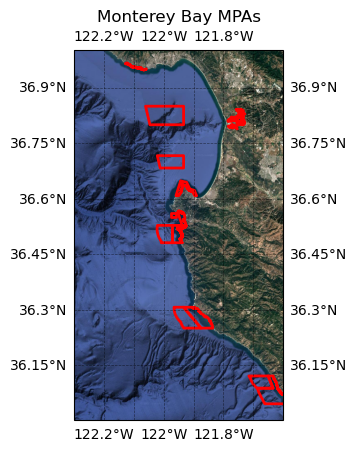

In [44]:
# make a figure in the Mercator projection
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

# set the extent to the area around Monterey Bay
ax.set_extent([-122.3, -121.6, 36, 37], crs=ccrs.PlateCarree())

# add some background imagery
request = cimgt.GoogleTiles(style="satellite")
ax.add_image(request, 11)

# add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black',
                  alpha=0.5, linestyle='--', draw_labels=True)

# add the shapefile
for geometry in mpas.geometries():
    ax.add_geometries(geometry, ccrs.PlateCarree(),
                      facecolor='none', edgecolor='red', linewidth=2)

# add a title
plt.title('Monterey Bay MPAs')

# show the plot
plt.show()